In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [46]:
# Load the dataset
file_path = '/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv'

data = pd.read_csv(file_path)


# Display the first few rows of the dataset
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Basic Data Exploration

In [47]:
# Display basic information about the dataset
print("Dataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2 

In [48]:
# Describe the dataset
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Visualization

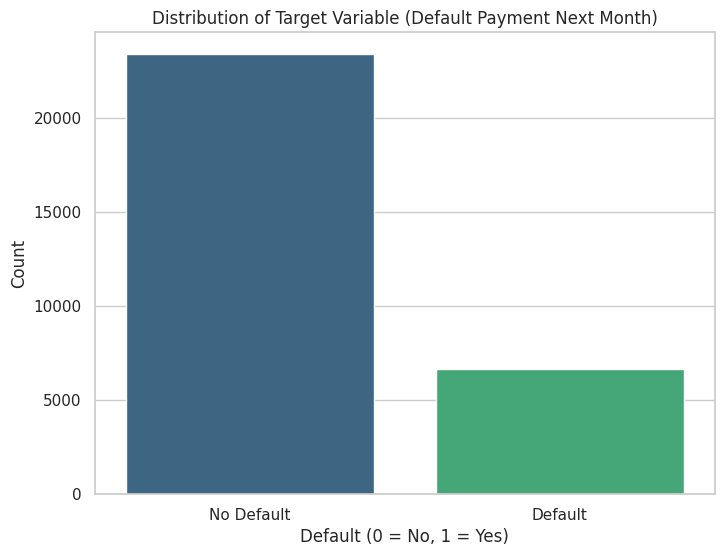

In [49]:
# Checking the distribution of the target variable ('default.payment.next.month')
plt.figure(figsize=(8, 6))
sns.countplot(x=data['default.payment.next.month'], palette='viridis')
plt.title('Distribution of Target Variable (Default Payment Next Month)')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.show()

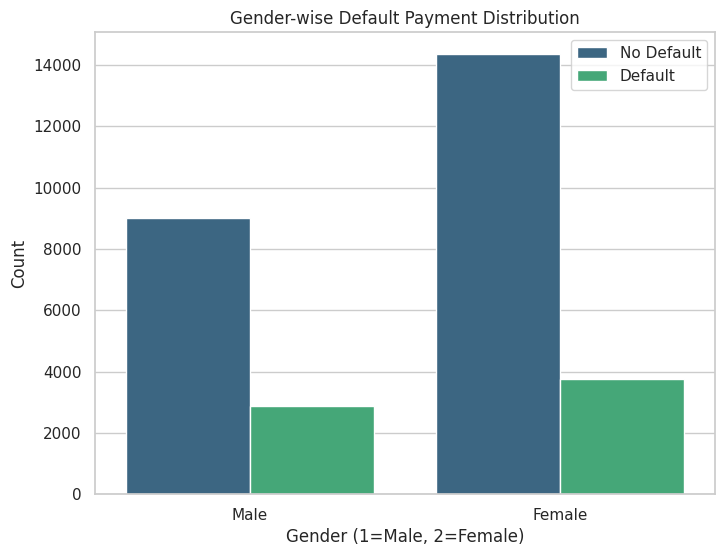

In [50]:
# Analyzing the distribution of default payments by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='SEX', hue='default.payment.next.month', data=data, palette='viridis')
plt.title('Gender-wise Default Payment Distribution')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.legend(['No Default', 'Default'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

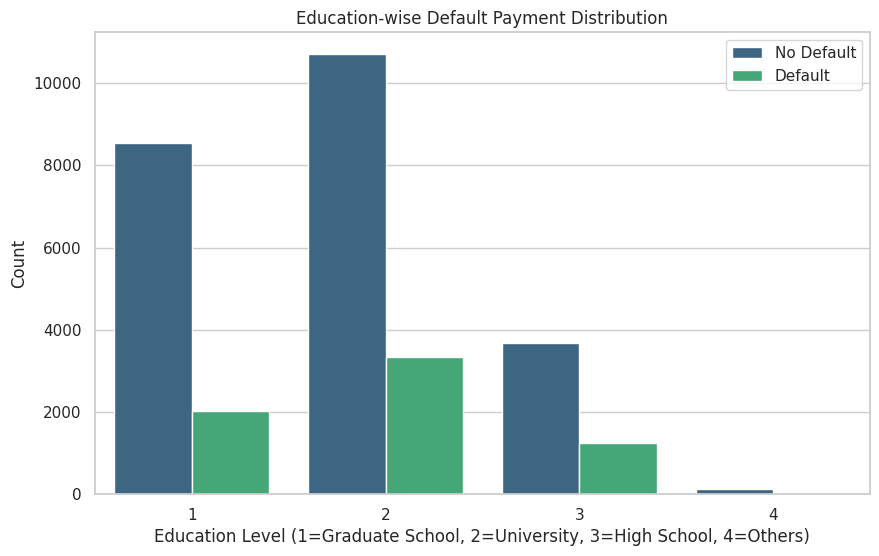

In [51]:
# Filtering out unwanted education levels (0, 5, 6)
education_levels_to_include = [1, 2, 3, 4]
filtered_data = data[data['EDUCATION'].isin(education_levels_to_include)]

# Analyzing the distribution of default payments by education level
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=filtered_data, palette='viridis')
plt.title('Education-wise Default Payment Distribution')
plt.xlabel('Education Level (1=Graduate School, 2=University, 3=High School, 4=Others)')
plt.ylabel('Count')
plt.legend(['No Default', 'Default'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


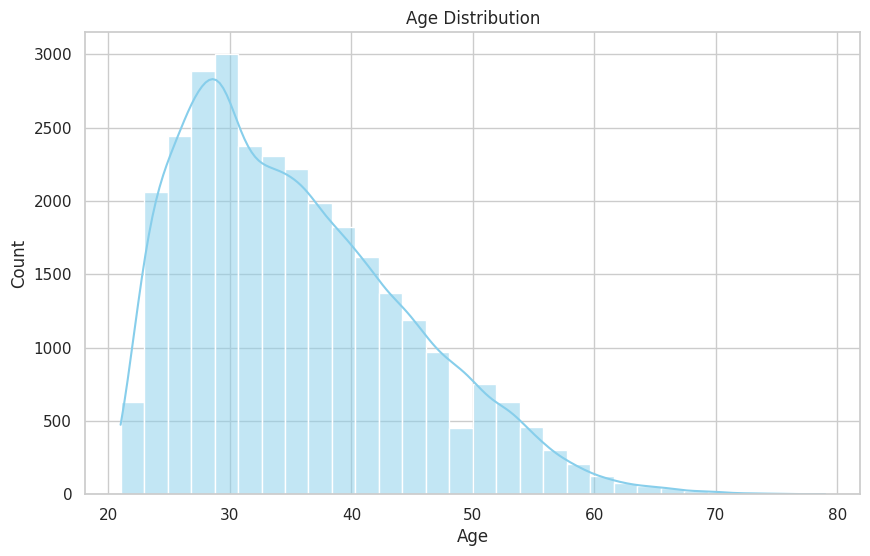

In [52]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Encoding Categorical Variables
# Replacing unknown categories with a single category
data['EDUCATION'] = data['EDUCATION'].replace({5: 4, 6: 4})  # Combine unknowns into a single category
data['MARRIAGE'] = data['MARRIAGE'].replace({0: 3})  # Consider 0 as others

# Splitting the data
X = data.drop(['ID', 'default.payment.next.month'], axis=1)
y = data['default.payment.next.month']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)


# Model training with Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train_balanced)

LogisticRegression(random_state=42, solver='liblinear')

In [56]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [57]:
# Evaluate the model
accuracy = log_reg.score(X_test_scaled, y_test)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)

Accuracy: 0.69
ROC-AUC Score: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      4673
           1       0.37      0.58      0.45      1327

    accuracy                           0.69      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000



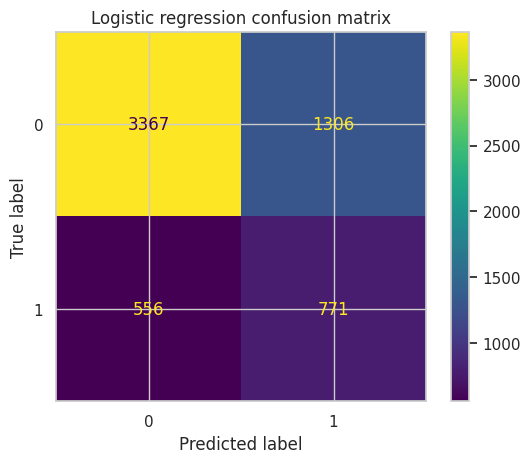

In [68]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_rep)

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_).plot()
plt.title("Logistic regression confusion matrix")
plt.show()

# Model training with Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_balanced)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]


Random Forest Accuracy: 0.79
Random Forest ROC-AUC Score: 0.74

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4673
           1       0.52      0.48      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.68      0.68      6000
weighted avg       0.78      0.79      0.78      6000



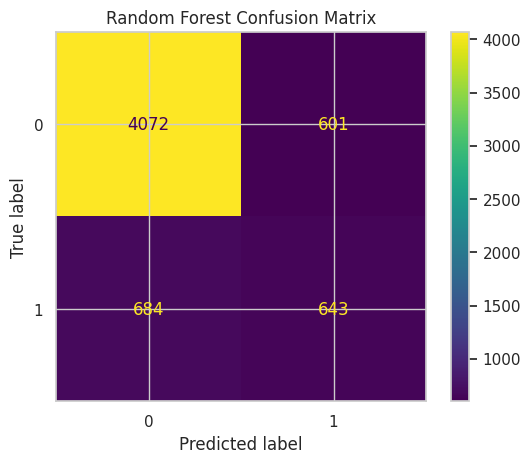

In [62]:
rf_accuracy = rf_model.score(X_test_scaled, y_test)
rf_roc_auc = roc_auc_score(y_test, rf_y_prob)
rf_classification_rep = classification_report(y_test, rf_y_pred)

# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest ROC-AUC Score: {rf_roc_auc:.2f}")
print("\nRandom Forest Classification Report:")
print(rf_classification_rep)


# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_model.classes_).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()



# Model Training with XGBoost

In [63]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train_balanced)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [64]:
# Make predictions
xgb_y_pred = xgb_model.predict(X_test_scaled)
xgb_y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]



XGBoost Accuracy: 0.76
XGBoost ROC-AUC Score: 0.73

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4673
           1       0.47      0.47      0.47      1327

    accuracy                           0.76      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.77      0.76      0.76      6000



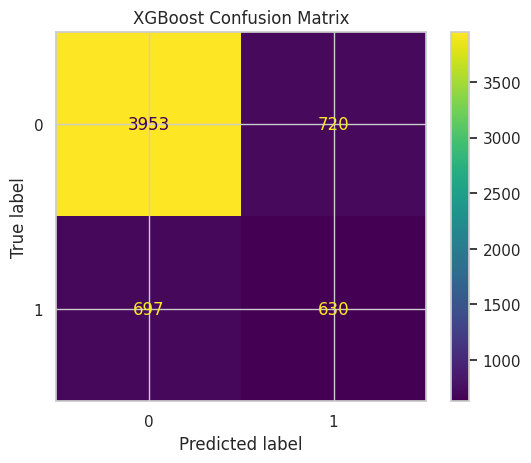

In [65]:
# Accuracy and ROC-AUC Score
xgb_accuracy = xgb_model.score(X_test_scaled, y_test)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_prob)

# Classification Report
xgb_classification_rep = classification_report(y_test, xgb_y_pred)

# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Print results
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"XGBoost ROC-AUC Score: {xgb_roc_auc:.2f}")
print("\nXGBoost Classification Report:")
print(xgb_classification_rep)

# Plot Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix, display_labels=xgb_model.classes_).plot()
plt.title("XGBoost Confusion Matrix")
plt.show()


# ROC curves for three models 

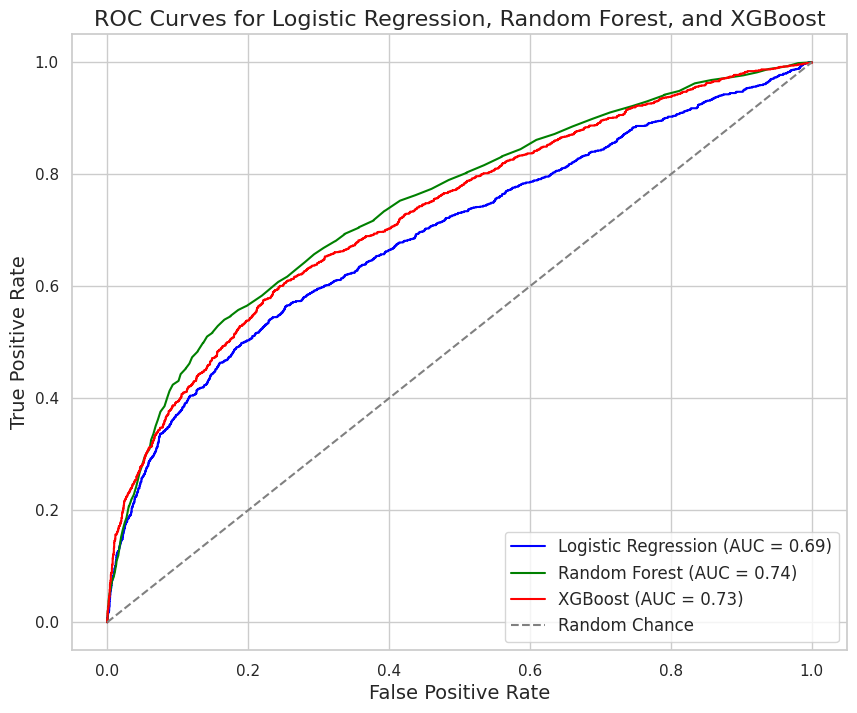

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the ROC curve (already trained models)
log_reg_y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
rf_y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves and AUC scores
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg_y_prob)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob)
rf_auc = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC Curves
plt.figure(figsize=(10, 8))
plt.plot(log_reg_fpr, log_reg_tpr, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')

# Plot random chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')

# Titles and labels
plt.title('ROC Curves for Logistic Regression, Random Forest, and XGBoost', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

# Legend
plt.legend(loc='lower right', fontsize=12)

# Show plot
plt.grid(True)
plt.show()
